In [1]:
from Angrybird import AngryBird
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
env=AngryBird()
def main(state):
    t = state[0]
    return -state[1:]+np.array([10*t, 20*t-2*t**2])

def main2(state):
    t = state[0]
    return np.array([10*t, 20*t-2*t**2])-1.001*state[1:]

In [7]:
env.reset(False)
for _ in range(10):
    env.step(np.zeros(2))

In [7]:
%%time
def coeff_force(coeff1, coeff2, force):
    return coeff1*force+coeff2

data = np.zeros((11, 11))
m = 10000
for _ in tqdm(range(m)):
    env.reset()
    for i in range(11):
        coeff1 = 1.35 + i * 0.01
        for j in range(11):
            coeff2 = -0.2 + j * 0.04
            state = env.reset(False)
            for _ in range(11):
                force = main(state)
                force = coeff_force(coeff1, coeff2, force)
                state, _, _, _ = env.step(force)
            data[i][j] += np.sum(env.cost)
data /= m


CPU times: user 48min 32s, sys: 5min 7s, total: 53min 40s
Wall time: 47min 6s


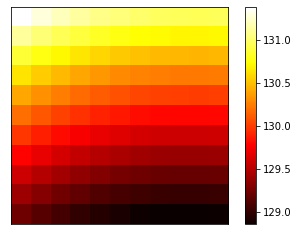

In [8]:
plt.imshow(data, cmap='hot',interpolation='nearest')
plt.xticks([])
plt.yticks([])
#plt.xlabel(list(np.linspace(1.30, 1.40, 11)))
#plt.yticks(list(np.linspace(-0.02, 0.02, 11)))
plt.colorbar()
plt.show()

### One coeff


1.61


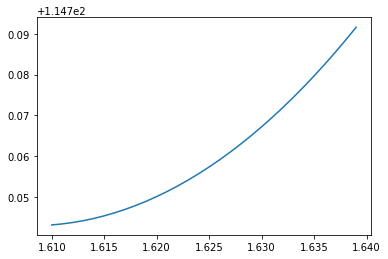

In [11]:
# main
n = 30
start = 1.61
ecart = 0.03/30
dataa = np.zeros(n)
m = 1000
for _ in tqdm(range(m)):
    env.reset()
    for i in range(n):
        coeff1 = start + i * ecart
        state = env.reset(False)
        for j in range(11):
            force = coeff1*main(state)
            state, _, _, _ = env.step(force)
        dataa[i] += np.sum(env.cost)
dataa /= m
plt.plot([start + i * ecart for i in range(n)], dataa)
print(start + np.argmin(dataa) * ecart)

In [34]:
def main(state):
    t = state[0]
    return -state[1:]+np.array([10*t, 20*t-2*t**2])

def main2(state):
    t = state[0]
    return np.array([10*t, 20*t-2*t**2])-1.0195*state[1:]


1.7333333333333334


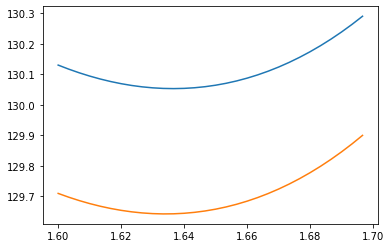

In [35]:
n = 30
start = 1.6
ecart = 0.1/30
dataa = np.zeros((2, n))
m = 100
funcs = [main, main2]
for _ in tqdm(range(m)):
    env.reset()
    for i in range(n):
        coeff1 = start + i * ecart
        for j in range(2):
            state = env.reset(False)
            for _ in range(11):
                force = coeff1*funcs[j](state)
                state, _, _, _ = env.step(force)
            dataa[j][i] += np.sum(env.cost)
dataa /= m
plt.plot([start + i * ecart for i in range(n)], dataa[0, :])
plt.plot([start + i * ecart for i in range(n)], dataa[1, :])
print(start + np.argmin(dataa) * ecart)

In [66]:
def main(state):
    t = state[0]
    return -state[1:]+np.array([10*t, 20*t-2*t**2])

def main(state, coeff):
    t = state[0]
    return np.array([10*t, 20*t-2*t**2])-coeff*state[1:]


2.34


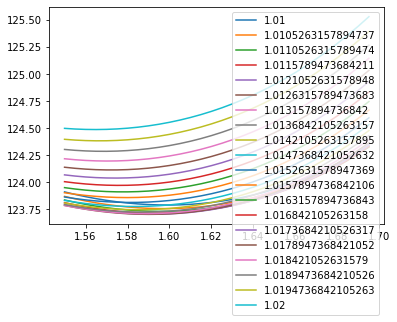

In [69]:
n = 30
start = 1.55
ecart = 0.15/30
coeffs = np.linspace(1.01, 1.02, num=20)
p = len(coeffs)
dataa = np.zeros((p, n))
m = 10000

for _ in tqdm(range(m)):
    env.reset()
    for i in range(n):
        coeff1 = start + i * ecart
        for j in range(p):
            state = env.reset(False)
            for _ in range(11):
                force = coeff1 * main(state, coeffs[j])
                state, _, _, _ = env.step(force)
            dataa[j][i] += np.sum(env.cost)
dataa /= m
for q in range(p):
    plt.plot([start + i * ecart for i in range(n)], dataa[q, :], label=str(coeffs[q]))
plt.legend()
print(start + np.argmin(dataa) * ecart)

1.59


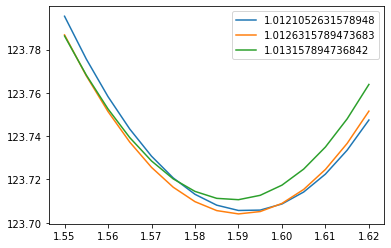

In [79]:
for q in range(4, p-13):
    plt.plot([start + i * ecart for i in range(n//2)], dataa[q, :n//2], label=str(coeffs[q]))
plt.legend()
print(start + np.argmin(dataa[5]) * ecart)

# 4 coeff

In [25]:
coeffs = np.ones(4)
coeffs[:2] = 1.59
coeffs[2:] = 1.0125*1.59

In [26]:
seconds = np.arange(11)
pos = np.zeros((11, 2))
pos[:, 0] = seconds * 10
pos[:, 1] = seconds * 20 - 2 * seconds**2

In [27]:
def main(state, coeffs):
    t = state[0]
    return coeffs[:2]*pos[int(t)]-coeffs[2:]*state[1:]

In [28]:
vents = np.load("vents.npy")

In [ ]:
from tqdm.notebook import tqdm
m = 10000
for ecart in tqdm([0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]):
    for i in range(4):
        coeff_change = np.linspace(coeffs[i]-ecart, coeffs[i]+ecart, 10)
        costs = np.zeros(10)
        for j in range(10):
            coeffs[i] = coeff_change[j]
            for z in range(m):
                state = env.reset()
                env.vent=vents[z]
                for _ in range(11):
                    force = main(state, coeffs)
                    state, _, _, _ = env.step(force)
                costs[j] += env.cost.sum()
        #print(coeff_change[np.argmin(costs)])
        coeffs[i] = coeff_change[np.argmin(costs)]

In [ ]:
np.save("c", coeffs)